In [11]:
import astropy.io
from astropy.io import fits
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import scipy.optimize as opt
from scipy.optimize import curve_fit
from itertools import islice


In [12]:
target1 = pd.read_csv('J004600.26-002122.4.csv')
opflux = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328)
opflux_err = (3631 * 3.6 * 10**(-10) * np.sinh(-0.92103 * (target1.Mag + target1.Magerr)+22.4328)) - (3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * target1.Mag)+22.4328))                

<ErrorbarContainer object of 3 artists>

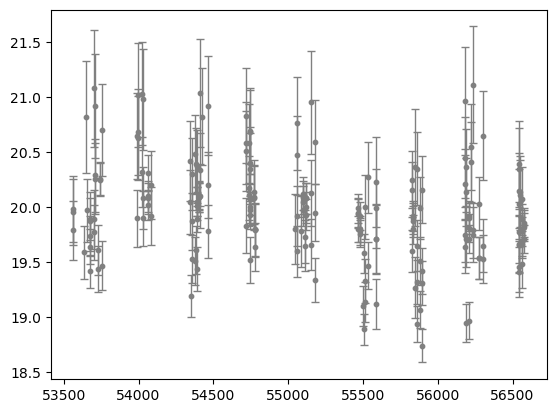

In [13]:
plt.scatter(target1.MJD,target1.Mag, s = 10, color = 'gray')
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray')
plt.axvline(x= 52199, color ='g')	
#plt.axvline(x= , color ='g')
#plt.axvline(x= , color ='g')
#plt.axvline(x= , color ='g')

In [14]:
sorted_MJD =sorted(target1.MJD)
len(sorted_MJD)

197

In [34]:
diff = []
for i in range(0,len(sorted_MJD)-1):
    diff.append(sorted_MJD[i+1] -sorted_MJD[i])
diff

[0.011919999997189734,
 0.006009999997331761,
 73.87797000000137,
 11.971879999997327,
 5.986210000002757,
 19.96918000000005,
 1.0555400000012014,
 0.003010000000358559,
 0.0029900000008638017,
 0.0029900000008638017,
 26.769549999997253,
 0.013120000003254972,
 0.0064399999973829836,
 6.995549999999639,
 0.0063999999983934686,
 0.006330000003799796,
 19.02885999999853,
 0.006199999996169936,
 14.99500000000262,
 0.01969000000099186,
 12.919020000001183,
 0.024069999999483116,
 233.33729999999923,
 0.006419999997888226,
 5.8181600000025355,
 0.007149999997636769,
 0.014320000002044253,
 27.935939999995753,
 0.02409000000625383,
 6.025249999998778,
 0.012969999996130355,
 0.006470000000263099,
 31.88832000000548,
 0.006119999998190906,
 0.006109999994805548,
 0.006140000004961621,
 18.983430000000226,
 0.0054899999959161505,
 264.28459000000294,
 0.006410000001778826,
 5.927709999996296,
 3.848649999999907,
 0.006430000001273584,
 0.012880000002041925,
 22.07630000000063,
 0.0064999999

In [42]:
sum = 0
seppt = []
for j in range (0,len(diff)):
    if diff[j] >100:
        sum += 1
        seppt.append(j)
print(sum)
seppt

8


[22, 38, 65, 87, 109, 130, 150, 175]

In [43]:
slice_length = []
slice_length.append(seppt[0]+1)

for i in range(0,len(seppt)-1):
    slice_length.append(seppt[i+1]-seppt[i])
slice_length.append(len(sorted_MJD)-seppt[-1])
slice_length

[23, 16, 27, 22, 22, 21, 20, 25, 22]

In [44]:
Input = iter(sorted_MJD)
grouped_MJD =  [list(islice(Input, elem)) for elem in slice_length] 

In [45]:
data = target1.sort_values('MJD')
target1.sort_values('MJD')

,InputID,ID,Mag,Magerr,RA,Decl,MJD,Blend
5,J004600.26-002122.4,1001005044114,19.96,0.30,11.50084,-0.35631,53563.43347,0
6,J004600.26-002122.4,1001005044114,19.98,0.30,11.50095,-0.35611,53563.44539,0
7,J004600.26-002122.4,1001005044114,19.79,0.27,11.50095,-0.35636,53563.45140,0
14,J004600.26-002122.4,1001005044114,19.59,0.24,11.50144,-0.35655,53637.32937,0
12,J004600.26-002122.4,1001005044114,20.82,0.51,11.50084,-0.35604,53649.30125,0
...,...,...,...,...,...,...,...,...
192,J004600.26-002122.4,2000011017518,19.67,0.13,11.50104,-0.35621,56560.44635,0
193,J004600.26-002122.4,2000011017518,19.84,0.13,11.50106,-0.35615,56577.26202,0
194,J004600.26-002122.4,2000011017518,19.71,0.13,11.50114,-0.35617,56577.26963,0
195,J004600.26-002122.4,2000011017518,19.82,0.13,11.50114,-0.35622,56577.27730,0


In [46]:
df_1 = data.iloc[:seppt[0],:]
df_1.to_csv('Group1.csv', index=False)
print(df_1)
grouped_MJD[0][-1]

                 InputID             ID    Mag  Magerr        RA     Decl  \
5    J004600.26-002122.4  1001005044114  19.96    0.30  11.50084 -0.35631   
6    J004600.26-002122.4  1001005044114  19.98    0.30  11.50095 -0.35611   
7    J004600.26-002122.4  1001005044114  19.79    0.27  11.50095 -0.35636   
14   J004600.26-002122.4  1001005044114  19.59    0.24  11.50144 -0.35655   
12   J004600.26-002122.4  1001005044114  20.82    0.51  11.50084 -0.35604   
13   J004600.26-002122.4  1001005044114  19.97    0.29  11.50054 -0.35670   
8    J004600.26-002122.4  1001005044114  19.87    0.27  11.50141 -0.35607   
143  J004600.26-002122.4  2000011017518  19.64    0.16  11.50111 -0.35625   
144  J004600.26-002122.4  2000011017518  19.74    0.18  11.50107 -0.35623   
145  J004600.26-002122.4  2000011017518  19.89    0.19  11.50114 -0.35616   
146  J004600.26-002122.4  2000011017518  19.42    0.15  11.50108 -0.35636   
9    J004600.26-002122.4  1001005044114  19.89    0.27  11.50124 -0.35627   

53757.1114

In [47]:
df_2 = data.iloc[seppt[0]+1:seppt[1],:]
print(df_2)
df_2.to_csv('Group2.csv', index=False)
grouped_MJD[1][-1]

                 InputID             ID    Mag  Magerr        RA     Decl  \
24   J004600.26-002122.4  1001005044114  19.90    0.26  11.50133 -0.35656   
25   J004600.26-002122.4  1001005044114  20.65    0.39  11.50033 -0.35671   
26   J004600.26-002122.4  1001005044114  21.02    0.47  11.49947 -0.35808   
27   J004600.26-002122.4  1001005044114  20.63    0.38  11.50075 -0.35643   
28   J004600.26-002122.4  1001005044114  20.68    0.39  11.50090 -0.35638   
19   J004600.26-002122.4  1001005044114  20.32    0.32  11.50131 -0.35609   
20   J004600.26-002122.4  1001005044114  21.03    0.47  11.50087 -0.35588   
21   J004600.26-002122.4  1001005044114  19.90    0.25  11.50043 -0.35678   
22   J004600.26-002122.4  1001005044114  20.08    0.28  11.50104 -0.35685   
23   J004600.26-002122.4  1001005044114  20.98    0.46  11.50077 -0.35644   
149  J004600.26-002122.4  2000011017518  20.08    0.14  11.50116 -0.35626   
150  J004600.26-002122.4  2000011017518  20.02    0.14  11.50114 -0.35631   

54081.19508

In [48]:
df_3 = data.iloc[seppt[1]+1:seppt[2],:]
#print(df_3)
df_3.to_csv('Group3.csv', index=False)
grouped_MJD[2][-1]

54466.15399

In [49]:
df_4 = data.iloc[seppt[2]+1:seppt[3],:]
#print(df_4)
df_4.to_csv('Group4.csv', index=False)
grouped_MJD[3][-1]

54778.27532

In [50]:
df_5 = data.iloc[seppt[3]+1:seppt[4],:]
#print(df_5)
df_5.to_csv('Group5.csv', index=False)
grouped_MJD[4][-1]

55181.12515

In [51]:
df_6 = data.iloc[seppt[4]+1:seppt[5],:]
#print(df_6)
df_6.to_csv('Group6.csv', index=False)
grouped_MJD[5][-1]

55588.10675

In [52]:
df_7 = data.iloc[seppt[5]+1:seppt[6],:]
#print(df_7)
df_7.to_csv('Group7.csv', index=False)
grouped_MJD[6][-1]

55893.17736

In [53]:
df_8 = data.iloc[seppt[6]+1:seppt[7],:]
#print(df_8)
df_8.to_csv('Group8.csv', index=False)
grouped_MJD[7][-1]

56299.08429

In [55]:
df_9 = data.iloc[seppt[7]+1:,:]
#print(df_9)
df_9.to_csv('Group9.csv', index=False)
grouped_MJD[8][-1]

56577.28489

In [32]:
df_10 = data.iloc[seppt[8]+1:seppt[9],:]
#print(df_10)
df_10.to_csv('Group10.csv', index=False)
grouped_MJD[9][-1]

56299.08429

In [33]:
df_11 = data.iloc[seppt[9]+1:,:]
#print(df_10)
df_10.to_csv('Group11.csv', index=False)
grouped_MJD[10][-1]

56577.28489

In [56]:
med = []
centerMJD = []
medMJD = []
medopflux = []

g1 = pd.read_csv('group1.csv')
med1 = np.median(g1.Mag)
centerMJD1 = np.mean(g1.MJD)
medMJD1 = np.median(g1.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g1.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


g2 = pd.read_csv('group2.csv')
med1 = np.median(g2.Mag)
centerMJD1 = np.mean(g2.MJD)
medMJD1 = np.median(g2.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g2.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g3 = pd.read_csv('group3.csv')
med1 = np.median(g3.Mag)
centerMJD1 = np.mean(g3.MJD)
medMJD1 = np.median(g3.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g3.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g4 = pd.read_csv('group4.csv')
med1 = np.median(g4.Mag)
centerMJD1 = np.mean(g4.MJD)
medMJD1 = np.median(g4.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g4.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g5 = pd.read_csv('group5.csv')
med1 = np.median(g5.Mag)
centerMJD1 = np.mean(g5.MJD)
medMJD1 = np.median(g5.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g5.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g6 = pd.read_csv('group6.csv')
med1 = np.median(g6.Mag)
centerMJD1 = np.mean(g6.MJD)
medMJD1 = np.median(g6.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g6.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g7 = pd.read_csv('group7.csv')
med1 = np.median(g7.Mag)
centerMJD1 = np.mean(g7.MJD)
medMJD1 = np.median(g7.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g7.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g8 = pd.read_csv('group8.csv')
med1 = np.median(g8.Mag)
centerMJD1 = np.mean(g8.MJD)
medMJD1 = np.median(g8.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g8.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g9 = pd.read_csv('group9.csv')
med1 = np.median(g9.Mag)
centerMJD1 = np.mean(g9.MJD)
medMJD1 = np.median(g9.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g9.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)



In [ ]:
g10 = pd.read_csv('group10.csv')
med1 = np.median(g10.Mag)
centerMJD1 = np.mean(g10.MJD)
medMJD1 = np.median(g10.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g10.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)

g11 = pd.read_csv('group11.csv')
med1 = np.median(g11.Mag)
centerMJD1 = np.mean(g11.MJD)
medMJD1 = np.median(g11.MJD)
medMJD.append(medMJD1)
med.append(med1)
centerMJD.append(centerMJD1)
opflux1 = 3631 * 3.6 * 10**(-10) * np.sinh(-(0.92103 * g11.Mag)+22.4328)
med_opflux1 = np.median(opflux1)
medopflux.append(med_opflux1)


In [57]:
med

[19.925, 20.31, 20.09, 20.11, 19.97, 19.79, 19.8, 19.854999999999997, 19.82]

In [58]:
centerMJD

[53679.82356636365,
 54029.27251466667,
 54391.734310769236,
 54744.771171904766,
 55109.34107,
 55512.59286450001,
 55858.202302105274,
 56221.092394583335,
 56554.28718380952]

In [59]:
medMJD


[53689.705945,
 54030.28003,
 54389.308690000005,
 54741.41779,
 55113.2627,
 55506.292145,
 55864.17256,
 56211.261595,
 56550.31595]

In [60]:
medopflux


[3.8714771978947546e-05,
 2.7134628210170825e-05,
 3.3235895473971154e-05,
 3.262880130255206e-05,
 3.712277789182986e-05,
 4.382243926652741e-05,
 4.34186533384642e-05,
 4.130844665510315e-05,
 4.2625814651445904e-05]

Text(0.5, 1.0, 'Mag Vs MJD with Mag error bars')

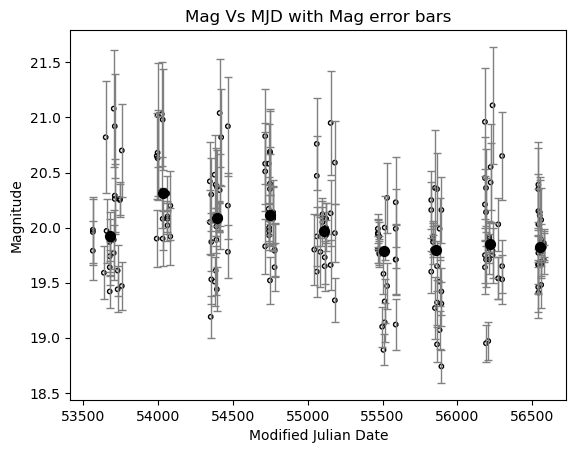

In [61]:
plt.scatter(target1.MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(centerMJD,med, s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 52199, color ='g')	
#plt.axvline(x= 53379, color ='g')		

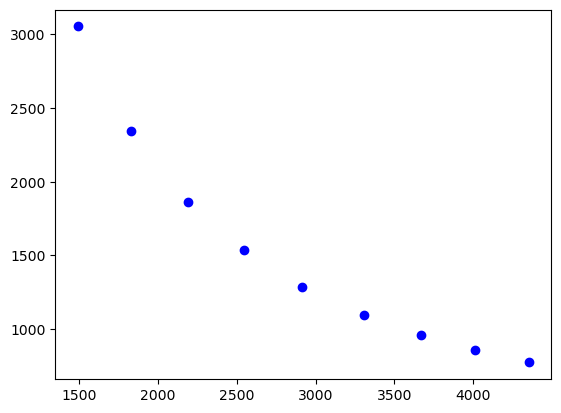

In [64]:
def f(x, a, b, c):
    return a * (x ** b) + c
x = np.array([item - 52199 for item in medMJD])
y = f(x,4.05245427e+07,-1.3, 1.81095672e+01)
rng = np.random.default_rng()
y_noise = 0.001* rng.normal(size=x.size)
ydata = y + y_noise
plt.scatter(x, ydata, color = 'b')


In [85]:
popt, pcov = curve_fit(f, x, med, maxfev =5000)


In [86]:
popt

array([-1.64219748e-07,  1.76208309e+00,  2.01879137e+01])

In [87]:
pcov

array([[ 1.85685219e-11,  1.31790826e-05, -1.41973717e-06],
       [ 1.31790826e-05,  9.35610696e+00, -1.00366126e+00],
       [-1.41973717e-06, -1.00366126e+00,  1.18099253e-01]])

In [75]:
popt, pcov = curve_fit(f, x, med,bounds=([-10**12,-10**3,-10**12],[10**12,10**3,10**12]), maxfev =5000)

In [76]:
popt

array([ 1.06284474e+03, -3.01979306e-04, -1.04034120e+03])

In [77]:
pcov

array([[ 8.17247782e+13,  2.32756719e+07, -8.17250124e+13],
       [ 2.32756719e+07,  6.62904099e+00, -2.32757386e+07],
       [-8.17250124e+13, -2.32757386e+07,  8.17252466e+13]])

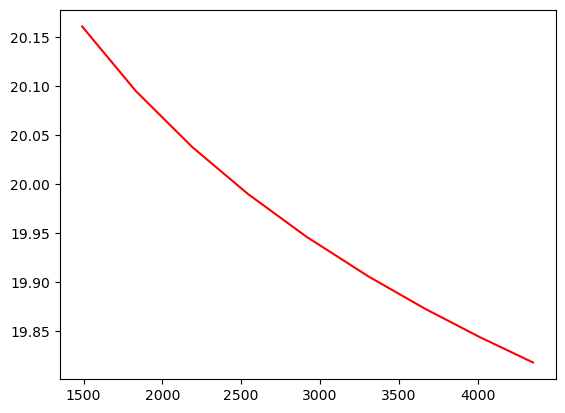

In [78]:
plt.plot(x, f(x,1.06284474e+03, -3.01979306e-04, -1.04034120e+03), 'r-')

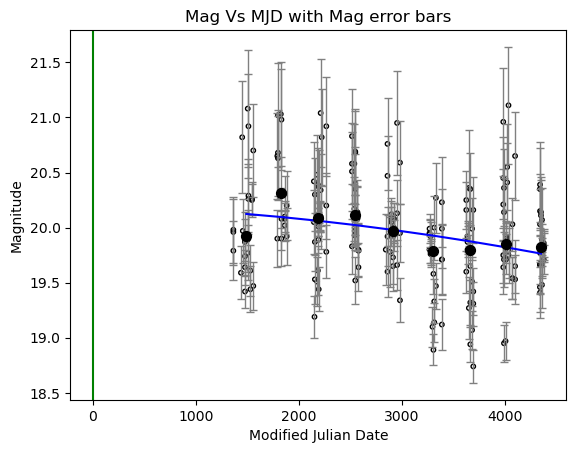

In [83]:
x = np.array([item - 52199 for item in medMJD])
MJD = np.array([item - 52199 for item in target1.MJD])
plt.scatter(MJD,target1.Mag , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,med, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,target1.Mag, yerr = target1.Magerr, fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Magnitude')
plt.title('Mag Vs MJD with Mag error bars')

plt.axvline(x= 0, color ='g')	
#plt.axvline(x= , color ='g')
#plt.plot(x, f(x,1.06284474e+03, -3.01979306e-04, -1.04034120e+03), 'r-', zorder=3)
plt.plot(x, f(x,-1.64219748e-07,  1.76208309e+00,  2.01879137e+01), 'b-', zorder=3)
#plt.plot(x, func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'y-', zorder=3)
#plt.plot(x, func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'g', zorder=3)



In [88]:
 np.sqrt(np.diag(pcov))

array([4.30912078e-06, 3.05877540e+00, 3.43655718e-01])

In [163]:
mase(med,func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01))

0.7253446768437793

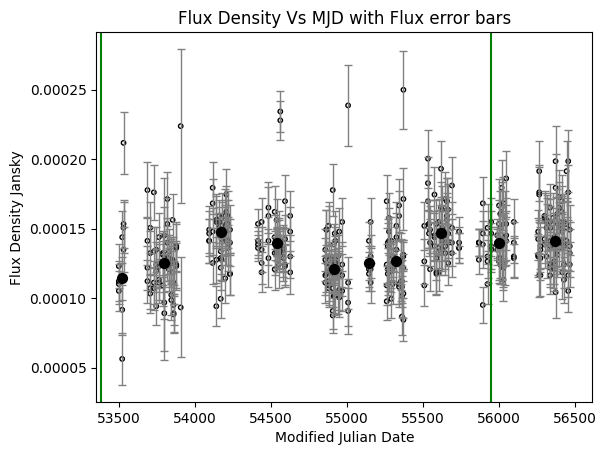

In [127]:
plt.scatter(target1.MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(medMJD,medopflux , s =50, color = 'k', zorder =3 )
plt.errorbar(target1.MJD,opflux, yerr = np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('Flux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

plt.axvline(x= 55945, color ='g')	
plt.axvline(x= 53379, color ='g')

In [128]:
popt, pcov = curve_fit(f, x, medopflux, maxfev =5000)

In [129]:
popt

array([ 0.01887103,  0.00019581, -0.01876289])

In [130]:
popt, pcov = curve_fit(f, x, medopflux,bounds=([-10**12,-10,0],[10**12,10,0.003]))

In [131]:
popt

array([-5.36516262e-05, -1.22346300e-01,  1.57132102e-04])

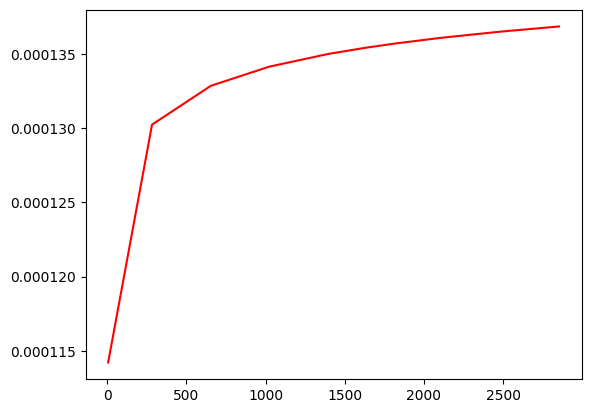

In [132]:
plt.plot(x, func(x,-5.36516262e-05, -1.22346300e-01,  1.57132102e-04), 'r-')

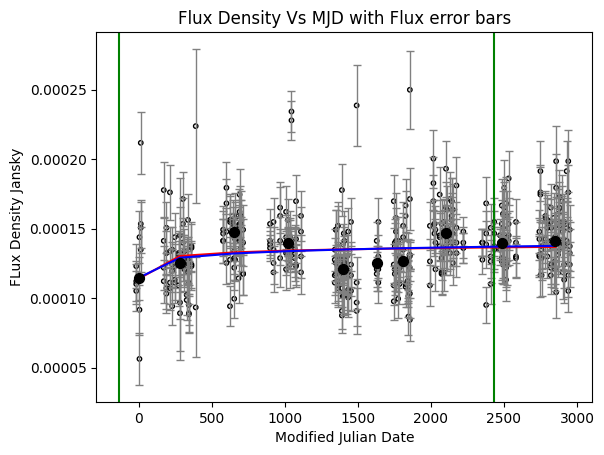

In [139]:
x = np.array([item - 53514 for item in medMJD])
MJD = np.array([item - 53514 for item in target1.MJD])
plt.scatter(MJD,opflux , s = 10, edgecolors = 'k', facecolors = 'none', zorder = 1)
plt.scatter(x,medopflux, s =50, color = 'k', zorder =4 )
plt.errorbar(MJD,opflux, yerr =np.absolute(opflux_err), fmt = 'None', linewidth=1, capsize=3, color = 'gray', zorder=2)
plt.xlabel('Modified Julian Date')
plt.ylabel('FLux Density Jansky')
plt.title('Flux Density Vs MJD with Flux error bars')

plt.axvline(x= 55945-53514, color ='g')	
plt.axvline(x= 53379-53514, color ='g')
plt.plot(x, func(x,-5.36516262e-05, -1.22346300e-01,  1.57132102e-04), 'r-', zorder=3)
plt.plot(x, func(x,0.01887103,  0.00019581, -0.01876289), 'b-', zorder=3)
#plt.plot(x, func(x,-2.99993383e+00,  1.00423610e-02,  2.17984336e+01), 'b-', zorder=3)

In [140]:
def mase(actual : np.ndarray, predicted : np.ndarray):

    forecast_error = np.mean(np.abs(actual - predicted))
    naive_forecast = np.mean(np.abs(np.diff(actual)))
    mase = forecast_error / naive_forecast

    return mase

In [146]:
actual = medopflux
predicted1 = func(x,-5.36516262e-05, -1.22346300e-01,  1.57132102e-04)
predicted2 = func(x,0.01887103,  0.00019581, -0.01876289)



In [147]:
mase(actual,predicted1)

0.7396127933310956

In [148]:
mase(actual,predicted2)

0.7311806579575137

In [ ]:
resid = opflux - func(x,0.01887103,  0.00019581, -0.01876289)
chi2 = sum((resid / func(x,0.01887103,  0.00019581, -0.01876289))**2)
chi2_red = chi2 / dof
